This is the solution to the task of finalexam-part1

---

# Assignment

请⽤Python编写代码以实现：

1. ⼀个Bisection算法函数：输⼊任意函数、包含⼀个根的区间、⽬标误差，输出满⾜条件的近似根。

2. ⼀个Newton算法函数：输⼊任意函数、导数、根的估计值、⽬标误差，输出满⾜条件的近似根。

3. 请⽤Numpy/Scipy中的求根函数对以下⽅程进⾏求解，并与上述两种算法的结果进⾏⽐较(⽬标误差设置为$\epsilon = 10^{-10}$)：

    1. $2x=tan(x), x \in [-0.2, 1.4]$
    1. $e^{x+1} = 2 + x, x \in [-2, 2]$
    1. $x^{-2} = sin(x), x \in [0.5, 4\pi]$ (提示： 在这个区间函数有多个根，请⽤合适的画图⽅法先⼤致确认每个根的区间或初始解再逐⼀求解)  

4. 误差分析：分别将上述两种算法应⽤于求解在区间内的根，⽐较两种算法的收敛速度，并将结果⽤图表形式展示出来。  
(注：收敛速度即是指根的近似值与真实值之间的误差随迭代次数的变化快慢的趋势)

# Solution 
To achieve these goals, we develop the module [rflib](rflib.py "Root Finding Library"), together with the guide document [README_rflib](README_rflib.md "guide document for rflib"). (Click them for more infomation and the sources.)  

In the following solution, we will directly use these functions in module `rflib` with some short description. (We strongly suggest you to read the guide document for features and uses of the module)

### Short introduce of the core function `root_finding()`

The core function of this module is **`root_finding()`**, which is defined as following:

```python
def root_finding(f, 
             method : str = None, 
             braket : list = None, 
             fprime = None, 
             x0 = None, 
             x1 = None, 
             epsilon = 100 * float_info.epsilon,
             loop_tol = 1000,
             plot = False,
             plot_interval = None) -> Root:
```

And the return of the function is of class `Root`, which is defined as following:

```python
class Root:
    """
    This is a simple class to store the calls, status of convergence, 
    error, the numerical root and the possible alarm during solving.
    """
    def __init__(self, method : str = None, converged : bool = None,
                 iterations : int = None, root : float = None, 
                 error : float = None, alarm : list = [], process : list = []) -> None:
        # for initialize an instance

    def __str__(self) -> str:
        # for formatting the alarming information and display the `Root`

    def show_process(self):
        # for showing the procession of solving 
        # function provided in ver 1.1
```

To have a better understanding in the following codes, we will shortly introduce the attributes in the class `Root`:
- method : ['Bisection', 'Newton']
- converged : status of convergence
- iterations : numbers of the iterations
- root : the approximate numerical root
- error : the error of the deciation between the appoximate root and the exact root
- alarm : the alarm during solution

Detailed guide documents please check the document [README_rflib](README_rflib.md "guide document for rflib")

---

## Code for the task

In [2]:
import rflib
import numpy as np
import scipy.optimize as sci

#### 1. $2x = tan(x), x \in [-0.2, 1.4]$

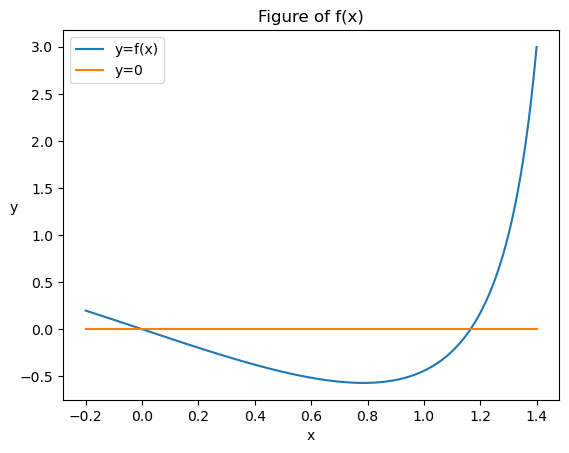

Here is the comparison between method Bisection:
rflib:

     method : Bisection
  converged : True
iterracions : 37
       root : 5.8207522135589324e-12
      error : 5.82076609134674e-12
      alarm : Given endpoints with same sign! Correcting attempt successed!

scipy.optimize:
      converged: True
           flag: converged
 function_calls: 4
     iterations: 2
           root: 0.0
--------------------------------------
Here is the comparison between method Newton:
rflib:

     method : Newton
  converged : True
iterracions : 15
       root : 1.1655611852082566
      error : 2.3172574969976267e-12
      alarm : None

scipy.optimize:
      converged: True
           flag: converged
 function_calls: 28
     iterations: 14
           root: 1.165561185212891


In [3]:
def f1(x):
    return np.tan(x) - 2 * x

def f1_prime(x):
    return 1 / (np.cos(x) ** 2) - 1

root_bisection = rflib.root_finding(f1, 'Bisection', braket=[-0.2, 1.4], epsilon = 1e-10, plot=True, plot_interval=[-0.2, 1.4])
# plot to find that there exists two root.
root_bisection_sci = sci.root_scalar(f1, method='bisect', bracket=[-0.2, 0.6], xtol=1e-10)
print('Here is the comparison between method Bisection:')
print('rflib:')
print(root_bisection)
print('\nscipy.optimize:')
print(root_bisection_sci)
print('--------------------------------------')
print('Here is the comparison between method Newton:')
root_newton = rflib.root_finding(f1, method="Newton", fprime = f1_prime, x0 = 1, epsilon= 1e-10)
root_newton_sci = sci.root_scalar(f1, method="newton", fprime=f1_prime, x0=1,xtol=1e-10)
print('rflib:')
print(root_newton)
print('\nscipy.optimize:')
print(root_newton_sci)

From the output, we see that using method of Bisection, `root_finding()` function gives a 'wrong' answer, for that we can easily point out the root $x_0 = 0$.

The reason why is that in the module `rflib`, the basic operation and calculation is based on **python**, while in the module `scipy`, that is base on `numpy`, whose base is **C**. Moreover, considering the storing mechanism of `float`, we can't correct the error automatically, while `scipy` gives some strategies to sovle that.

For science computing uses, the function `root_finding()` could play such a role in root finding. And for the additional feature to self-adjust some parameters, `root_finding()` is sometimes better than `root_scalar()` when the calculate of $f(x)$ doesn't cost much time.

---

#### 2. $e^{x + 1} = x + 2, x \in [-2, 2]$

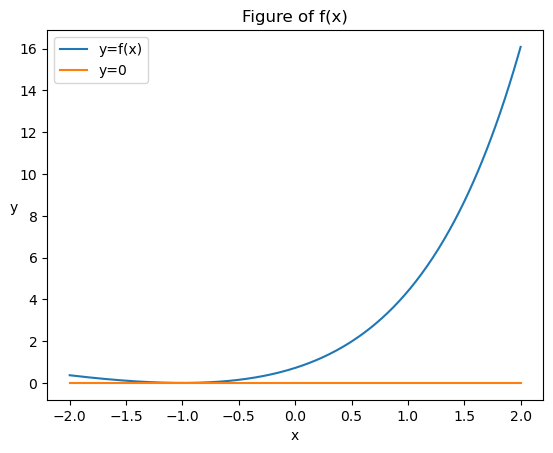

Here is the comparison between method Bisection:
rflib:

     method : Bisection
  converged : True
iterracions : 1
       root : -1.0
      error : 0
      alarm : Given endpoints with same sign! Correcting attempt successed!

scipy.optimize:
None
--------------------------------------
Here is the comparision between method Newton:
rflib:

     method : Newton
  converged : True
iterracions : 27
       root : -0.999999976214841
      error : 0
      alarm : None

scipy.optimize:
      converged: True
           flag: converged
 function_calls: 53
     iterations: 26
           root: -0.999999976214841


In [4]:
def f2(x):
    return np.exp(x + 1) - x - 2

def f2_prime(x):
    return np.exp(x + 1) - 1

root_bisection = rflib.root_finding(f2, 'Bisection', braket=[-2, 0], epsilon = 1e-10, plot=True, plot_interval=[-2, 2])
#root_bisection_sci = sci.root_scalar(f2, method='bisect', bracket=[-2, 0], xtol=1e-10)
# according to the figure, the root is such a minimal point. Function `root_scalar()` isn't available here, while `root_finding` could try the midium for once.
print('Here is the comparison between method Bisection:')
print('rflib:')
print(root_bisection)
print('\nscipy.optimize:')
print('None')
print('--------------------------------------')
print('Here is the comparision between method Newton:')
root_newton = rflib.root_finding(f2, method="Newton", fprime = f2_prime, x0 = 0, epsilon= 1e-10)
root_newton_sci = sci.root_scalar(f2, method="newton", fprime=f2_prime, x0=0, xtol=1e-10)
print('rflib:')
print(root_newton)
print('\nscipy.optimize:')
print(root_newton_sci)

From the output, we see that the process of the two function is quite similar.

And the reason why the error given by `root_finding()` is 0, is because the precision of calling $f(x)$ is limited, which result in $f(root') = 0$.

---

#### 3. $x^{-2} = sin(x), x \in [0.5, 4\pi]$

In [5]:
def f3(x):
    return np.sin(x) - 1 / (x ** 2)

def f3_prime(x):
    return np.cos(x) + 2 / (x ** 3)

First plot the figure of $f(x)$.

This time we don't use the ploting function provided by `root_finding()` itself, to show the process of ploting.

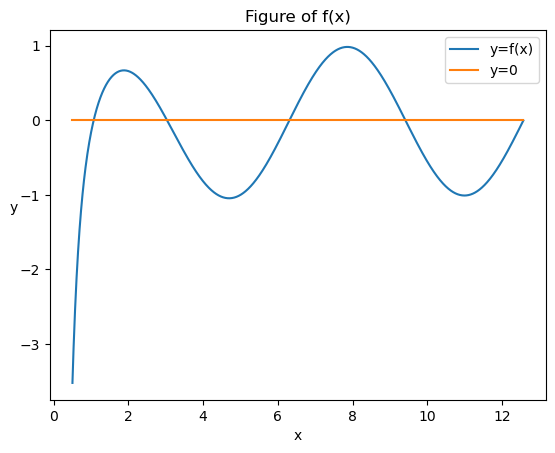

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plot_interval = [0.5, 4 * np.pi]
x = np.arange(plot_interval[0], plot_interval[1] + 0.01, 0.01)
plt.plot(x, f3(x), label = 'y=f(x)')
plt.plot([plot_interval[0], plot_interval[1]], [0, 0], label = 'y=0')
plt.xlabel('x')
plt.ylabel('y', rotation = 0)
plt.title('Figure of f(x)')
plt.legend()
plt.show()

Then we divided the interval to 4 sub-interval: $[0.5, 2], [2, 4], [4, 8], [8, 4\pi]$ and solve them respectively.

In the upcoming comparision, we will only compare the performance between them when using ***Bisection*** method respectively, and only compare once when using ***Newton*** method on the sub-interval $[0.5, 2]$

##### i. $[0.5, 2]$

In [7]:
braket = [0.5, 2]
root_bisection = rflib.root_finding(f3, 'Bisection', braket = braket, epsilon = 1e-10)
root_bisection_sci = sci.root_scalar(f3, method='bisect', bracket=braket, xtol=1e-10)
print('Here is the comparison between method Bisection:')
print('rflib:')
print(root_bisection)
print('\nscipy.optimize:')
print(root_bisection_sci)
print('--------------------------------------')
print('Here is the comparison between method Newton:')
root_newton = rflib.root_finding(f3, method="Newton", fprime = f3_prime, x0 = 1, epsilon= 1e-10)
root_newton_sci = sci.root_scalar(f3, method="newton", fprime=f3_prime, x0=1,xtol=1e-10)
print('rflib:')
print(root_newton)
print('\nscipy.optimize:')
print(root_newton_sci)

Here is the comparison between method Bisection:
rflib:

     method : Bisection
  converged : True
iterracions : 37
       root : 1.0682235442018282
      error : 5.4569682106375694e-12
      alarm : None

scipy.optimize:
      converged: True
           flag: converged
 function_calls: 36
     iterations: 34
           root: 1.068223544250941
--------------------------------------
Here is the comparison between method Newton:
rflib:

     method : Newton
  converged : True
iterracions : 5
       root : 1.068223544197249
      error : 0.0
      alarm : None

scipy.optimize:
      converged: True
           flag: converged
 function_calls: 10
     iterations: 5
           root: 1.068223544197249


##### ii. $[2, 4]$

In [8]:
braket = [2, 4]
root_bisection = rflib.root_finding(f3, 'Bisection', braket = braket, epsilon = 1e-10)
root_bisection_sci = sci.root_scalar(f3, method='bisect', bracket=braket, xtol=1e-10)
print('Here is the comparison between method Bisection:')
print('rflib:')
print(root_bisection)
print('\nscipy.optimize:')
print(root_bisection_sci)

Here is the comparison between method Bisection:
rflib:

     method : Bisection
  converged : True
iterracions : 37
       root : 3.032645418388711
      error : 7.275957614183426e-12
      alarm : None

scipy.optimize:
      converged: True
           flag: converged
 function_calls: 37
     iterations: 35
           root: 3.032645418366883


##### iii. $[4, 8]$

In [9]:
braket = [4, 8]
root_bisection = rflib.root_finding(f3, 'Bisection', braket = braket, epsilon = 1e-10)
root_bisection_sci = sci.root_scalar(f3, method='bisect', bracket=braket, xtol=1e-10)
print('Here is the comparison between method Bisection:')
print('rflib:')
print(root_bisection)
print('\nscipy.optimize:')
print(root_bisection_sci)
print('--------------------------------------')

Here is the comparison between method Bisection:
rflib:

     method : Bisection
  converged : True
iterracions : 38
       root : 6.308316825270595
      error : 7.275957614183426e-12
      alarm : None

scipy.optimize:
      converged: True
           flag: converged
 function_calls: 38
     iterations: 36
           root: 6.308316825248767
--------------------------------------


##### iv. $[8, 4\pi]$

In [10]:
braket = [8, 4 * np.pi]
root_bisection = rflib.root_finding(f3, 'Bisection', braket = braket, epsilon = 1e-10)
root_bisection_sci = sci.root_scalar(f3, method='bisect', bracket=braket, xtol=1e-10)
print('Here is the comparison between method Bisection:')
print('rflib:')
print(root_bisection)
print('\nscipy.optimize:')
print(root_bisection_sci)
print('--------------------------------------')

Here is the comparison between method Bisection:
rflib:

     method : Bisection
  converged : True
iterracions : 38
       root : 9.413492803177306
      error : 8.306244581035571e-12
      alarm : None

scipy.optimize:
      converged: True
           flag: converged
 function_calls: 38
     iterations: 36
           root: 9.413492803152385
--------------------------------------


Notice that the 10th decimal place is '0', and the two is of highly correspondence.

#### 4. Error analyze

First, we use the built in function to plot the error curve.

Given that the converging speed depends on the initial value $x_0$ quite much, we first create 100 points scatter on the interval $[1, 2]$ evenly as the initial points, and record the iteration times. Then we plot them to decide from which to start with.

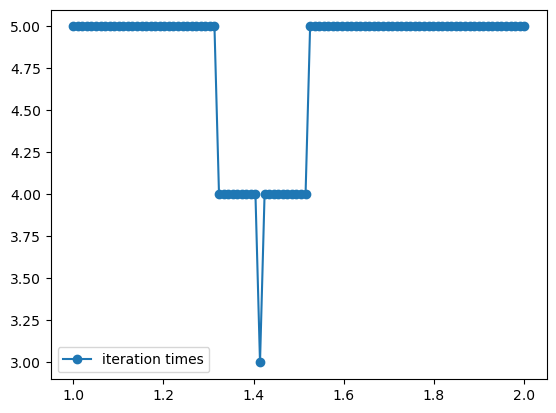

In [11]:
def f(x):
    return x ** 2 - 2

def fprime(x):
    return 2 * x

iteration_times = []
iteration_x = np.linspace(1, 2, 100)
for i in iteration_x:
    r = rflib.root_finding(f, method='Newton', fprime=fprime, x0=i, epsilon=1e-10)
    iteration_times.append(r.iterations)

plt.plot(iteration_x, iteration_times, '-o', label = 'iteration times')
plt.legend()

From the figure we know that the maximum of iteration times is 5(when $\epsilon = 10^{-10}$), and that the iteration times shrinks when the initial value $x_0$ get close to $\sqrt2$.

To show the differences between the two method, we choose the initial value as 2

Here is the comparison of converging speed between method Bisection and Newton:
Bisection:

     method : Bisection
  converged : True
iterracions : 36
       root : 1.4142135623769718
      error : 7.275957614183426e-12
      alarm : None
--------------------------------------
Newton:

     method : Newton
  converged : True
iterracions : 5
       root : 1.4142135623730951
      error : 7.973621762857874e-13
      alarm : None


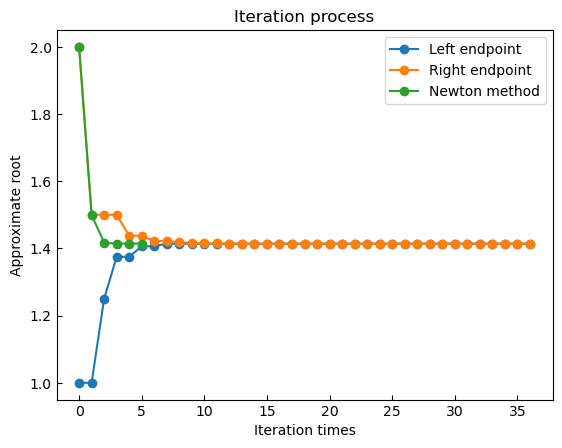

In [12]:
def f(x):
    return x ** 2 - 2

def fprime(x):
    return 2 * x

root_b = rflib.root_finding(f, method='Bisection', braket = [1, 2], epsilon=1e-10)
root_n = rflib.root_finding(f, method='Newton', fprime=fprime, x0=2, epsilon=1e-10)
print('Here is the comparison of converging speed between method Bisection and Newton:')
print('Bisection:')
print(root_b)
print('--------------------------------------')
print('Newton:')
print(root_n)
root_b.show_process(show = False)
root_n.show_process()
plt.show()

To detect the error when iterating, we denote the mid of the interval as the approximate root, and plot another figure as following.

This time, we shorten the scale of y to better detect the error of each algorithm

(-0.1, 0.1)

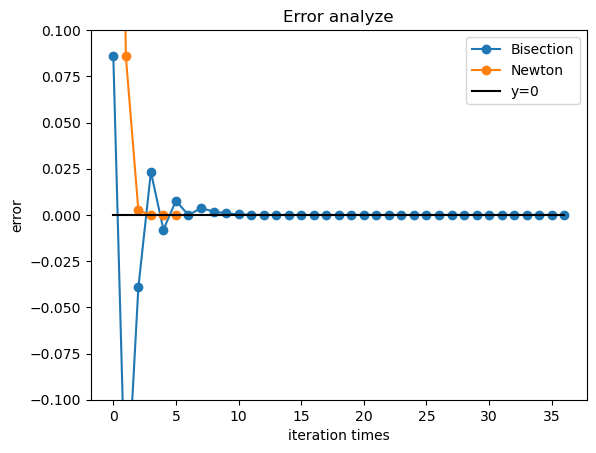

In [12]:
l_b = len(root_b.process)
temp_process_b = [(root_b.process[i][0] + root_b.process[i][1]) / 2 - 2 ** 0.5 for i in range(l_b)]
x = [i for i in range(l_b)]
plt.plot(x, temp_process_b, '-o', label = 'Bisection')

l_n = len(root_n.process)
temp_process_n = [root_n.process[i] - 2 ** 0.5 for i in range(l_n)]
x = [i for i in range(l_n)]
plt.plot(x, temp_process_n, '-o', label = 'Newton')

plt.plot([0, max(l_b, l_n) - 1], [0, 0], label = 'y=0', color = 'k')
plt.xlabel('iteration times')
plt.ylabel('error')
plt.title('Error analyze')
plt.legend()
plt.ylim(-0.1, 0.1)

From this we can have a better master of the interation process and the impressive converging speed of method `Newton`!

# A HAPPY ENDING!